# Studying Support Vector Machines

Having used support vector machines (SVM) for classification problems in work and kaggle
I decided to improve my understanding of the theory behind them. Following my study I found many tutorials and books to glance over some parts of the mathematics which made me confused. The notes below should help a lost learner to navigate.

The structure of this post is:

- Theory: mathematical formulation of SVM and derivation
- Scikit-learn Exploration: python scikit-learn for exploring SVM
- Multi-class: explore how multiple classes can be used with SVM

## Theory

We start with the idea that we want to separate a space by
decision boundaries in order to carry out classification. Hyperplanes
of an n-dimensional space $V$ are a subspace with dimension of
$n-1$. You can also see people referring to this as having a
codimension 1 in $V$ which simply means the difference between the
dimensions of the space and the smaller object contained in it. To
define a plane we need points on the plane in SVM we do this using
$\mathbf{x}$ which is a vector to such a point and a unit normal to
the plane ($\mathbf{w}$). Now for a space with $n=2$ dimensions we can
see this graphically as below.

$$
\mathbf{w} \cdot \mathbf{x} = 0
$$

<img src="img/origin_vector.svg"/>

The vectors $\mathbf{w}$ and $\mathbf{x}$ are orthogonal (the dot
product is zero). Using the above equation we can get other vectors
pointing to points which when dotted with $\mathbf{w}$ will give zero
and define the separating hyperplane. However, this is not a
generalized case. To see why lets consider what we are trying to do:
we need a plane that can pass anywhere in the space and in the above
case we can only go through the origin which will limit us in the
ability to form a decision boundary.

To generalize we need to allow $\mathbf{x}$ to pass through any point
on the coordinate system. We can do this by translating the vector
$\mathbf{x}$ by another vector $\mathbf{a}$. Note that $\mathbf{w}$
and $\mathbf{x}$ are still orthogonal to each other even after the
translation since the dot product considers the projection of the
vectors.

$$
\mathbf{w}\cdot (\mathbf{x-a})=0
$$

Graphically shown below.

<img src="img/arbitrary_vector.svg"/>

We can now see that the decision boundary does not necessarily need to
pass through the origin. To simplify the equation lets multiply the
terms.

$$\mathbf{w}\cdot \mathbf{x} - \mathbf{w}\cdot \mathbf{a} = 0$$

The dot product of $\mathbf{w}$ and $\mathbf{a}$ gives a scalar which we can dubiously call $-b$. Hence we get

$$\mathbf{w}\cdot \mathbf{x} + b = 0$$

For the multi-dimensional case the constant $\mathbf{w}_n$ and vectors to
the data points $\mathbf{x}_n$ are each of the dimension of the space
$V$. The equation can now be written as

$$\sum_{n} \mathbf{w}_{n} \mathbf{x}_{n} + b= 0$$

Or

$$w_{1} x_{1} + w_{2} x_{2} + \dots + w_{n} x_{n} + b= 0$$

Decision rules can now be written as a vector to a point passed
through the equation and will produce a value that will be higher or lower
than the constant $b$. We can then classify the data point based on
this rule.

Great so now we can define a separating plane which will divide the space and allows us to classifiy data. So lets look into what SVM are and how they make use of this. SVM is a technique for binary data classification. The formulation can be extended to multi-class classification and regression as I will show in the end. If we have a training set with labels and features then SVM can create a model which depends only on the most critical points called support vectors and predict the labels of new data. It is useful to define what is it that we want to achieve now since most of the work in SVM is to transform the initial solution into what we consider a useful solution. That is we are looking for an analytical linear convex optimization problem which has the ability to easily map the features to different spaces. The benefit being:

- Linear: linear problems are easier to express mathematically and thus to compute. This is extremely important when we want to change the feature space.
- Convex: convex optimization problems quarantee a local minima is a global minima and that first order conditions are sufficient for optimality. In other words setting the first order derivative to zero is enough for the optimizer to find the global mimima, unlike neural networks where we have no such benefits.

To train a SVM model we need data (duuh!). Given a training set of feature and label pairs $(\mathbf{x}^{i}, y^{i}), i=1,\ldots,N$ where $N$ is the number of data points, the features $\mathbf{x}^{i} \in R^{n}$ ($\mathbf{x}^{i}$ is a vector holding the features of a data point) and labels $y \in (-1, 1)$ the support vector machine finds a hyperplane which separates the classes by minimizing the error and maximizing the perpendicular distance between the closest (most critical) points [[0]](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf). The decision function is then fully specified by a subset of training samples known as support vectors. Using the terminology of Professor Winston shown [here [1]](https://www.youtube.com/watch?v=_PwhiWxHK8o), the support vectors are the gutters of the street with the center line being the hyperplane (in 2D this is just a line). The equations for the support vectors are given below, taken from the amazingly written article titled "An Idiot’s guide to Support vector
machines (SVMs)" [[2]](http://web.mit.edu/6.034/wwwbob/svm.pdf) - this was perfect for me :)

$$
\begin{aligned}
\mathbf{w}.\mathbf{x}^{i} + b = 1 && \text{support vector for } y^{i} = 1\\
\mathbf{w}.\mathbf{x}^{i} + b = 0 && \text{street center line}\\
\mathbf{w}.\mathbf{x}^{i} + b = -1 && \text{support vector for } y^{i} = -1
\end{aligned}
$$

What the above means is that if we get a vector $\mathbf{x}^{i}$ which points to a point on the hyperplane and the inner product with the normal to the hyperplane it will give a constant $b$. Mathematically $\mathbf{w} \cdot \mathbf{x}^{i} = ||\mathbf{w}||. ||\mathbf{x}^{i}|| cos(\theta) = -b$, where $ ||.|| $ denotes the Euclidean distance and $cos(\theta)$ is the cosine of the smaller angle between the two vectors. The other two equations are for the decision boundaries (hyperplanes that go through the closest points) and we just define that they give $1-b$ and $-1-b$.

Also assuming that no data points exist between the gutters i.e. our error has to be $0$, we get the following:

$$
\begin{aligned}
\mathbf{w}.\mathbf{x}^{i} + b \geq 1 && ,\text{if} && y^{i} = 1\\
\mathbf{w}.\mathbf{x}^{i} + b \leq -1 && ,\text{if} && y^{i} = -1
\end{aligned}
$$

Or we can combine them into one equation by using the variable $y_{i}$ as such: $y_{i} (\mathbf{x}_{i} . \mathbf{w})\geq 1$. The requirement that no data points exists in between means that the data is separable in the current space!

The above definition gives an inifite  number of hyperplanes since there are infinite values for $b$, therefore, we need more constraints. In SVM the additional constraint is that we choose the hyperplane which maximizes the distance between the decision boundaries. We wish to maximize the distance between the gutters (support vectors) and the center line of the street (hyperplane). This is the Euclidian distance expressed below for half of the street. We take the modulus of the of hyperplane since we are interested in the distance.

$$
\frac{|\mathbf{w}.\mathbf{x}+b|}{||\mathbf{w}||} = \frac{|+1|}{||\mathbf{w}||} = \frac{|-1|}{||\mathbf{w}||} = \frac{1}{||\mathbf{w}||}
$$

Due to symmetry the total distance is then given by

$$
\frac{2}{||\mathbf{w}||}
$$

To visualize what we have until now I have largely adapted a tikz script from Yifan Peng which you can find [here](http://blog.pengyifan.com/tikz-example-svm-trained-with-samples-from-two-classes/). The image shows linearly separable data.

<img src="./img/svm.svg" alt="drawing" width="500"/>

We can now follow the logical sequence than since it okay to maximize $2/||w||$ it is okay to maximize $1/||w||$ and minimize $||w||$. Finally, for mathematical convenience it is okay to minimize $\frac{1}{2}||w||^{2}$. The reason we go through this exercise is to optimize a quadratic function since when we get the derivative (eventually) the 2 in the denominator will cancel making our lives nice and easy. Our optimization problem then becomes:

$$
\arg \underset{\mathbf{w}} {min} \frac{1}{2}||\mathbf{w}||^{2}
$$

This is a constraint optimization problem with a quadratic surface which covers our requirement that a local extremum is a global extremum. We can now solve this optimization problem using Lagrange multipliers. A two dimensional case with features called $x_{1}$ and $x_{2}$ is illustrated as example. The image is taken from [this](https://en.wikipedia.org/wiki/Lagrange_multiplier) wikipedia article and shows a function $f(x,y)$ and a constraint $g(x,y)$. The solution of interest in this small example is to find the point where they "touch".

<img src="./img/LagrangeMultipliers2D.svg" alt="drawing" width="500"/>

We are looking for the maxima of $f$ to exist on $g$. If we superimpose the two functions, the gradients must line up, otherwise there is no solution. The gradient will return the direction in which a function increases most rappidly (steepest ascent). Now we require that the two gradients are in the same direction and therefore they must be multiples of each other. The constant which gives the equality is called a Lagrange multiplier and is needed because the directions of the vectors are parallel but the magnitudes as different. Mathematically this can be expressed as below.

$$
\nabla f = -\lambda \nabla g
$$

Where $\lambda$ is the Lagrange multiplier and $\nabla$ is the gradient given by $\nabla = \frac{\partial}{\partial x^{i}} \mathbf{e}^{i}$.

A little more explanation on the above is that at the solution point (assuming we have somehow found it) the constraint is tangent to the surface. This is what having a solution means. Now the derivatives of $f$ and $g$ will both point towards the extremum of $f$ which is the maxima in this case. There is no other way if a solution exists since we superimposed $g$ on $f$.

Rearranging gives

$$
\frac{\partial f}{\partial x^{i}} + \lambda \frac{\partial g}{\partial x^{i}} = 0
$$

We also need a second constraint which will we require the solution to also lie on the constraint. This is because the above equation only guarantees that the gradients are in the same direction which is necessary but not sufficient and we will get infinite solutions. To get a unique answer we need $g(\mathbf{x^{i}}) = 0$. For the derivatives to work we also need to assume the functions have continuous first derivatives $f, g \in C^{1}$. The problem can now be expressed as optimization of the Lagrangian $\mathcal{L}$.

$$
\mathcal{L} (x, \lambda) = f(x) + \lambda g(x)\\
\nabla \mathcal{L} = 0
$$

The above is exactly the same formulation as before as quickly shown below.

$$
\begin{aligned}
\nabla \mathcal{L} & = 0\\
\frac{\partial \mathcal{L}}{\partial x} & = 0 = \frac{\partial f}{\partial x} + \frac{\partial \lambda g}{\partial x} = \frac{\partial f}{\partial x} + \lambda \frac{\partial g}{\partial x}\\
\frac{\partial \mathcal{L}}{\partial \lambda} & = 0 = \frac{\partial f}{\partial \lambda} + \frac{\partial \lambda g}{\partial \lambda} = 0 + g(x) = g(x)
\end{aligned}
$$

We can now generalize the expression to multiple constraints.

$$
\mathcal{L} (x^{i}, \lambda) = f(x^{i}) + \sum_{i} \lambda_{i} g_{i} x^{i}
$$

We can now implement the Lagrangian for SVM. However, things are not so simple here. The above example problem was linear and allowed us to use to Lagrangian for equality constraints. The optimization problem for SVM is shown below and is known as the primal problem.

$$
\begin{aligned}
\arg \underset{{\mathbf{w}}}{min}
&& \frac{1}{2} ||\mathbf{w}||^{2} \\
\text{subject to}
&& y^{i} (\mathbf{w} \cdot \mathbf{x}^{i} + b) = 1
\end{aligned}
$$

Unfortunately the above optimization is extremely hard to solve since the problem explicitly depends on $\mathbf{w}$ and $b$. We need something better.

A major part of the work in SVM is to transform the above optimization problem to a form suitable for the Karush, Kuhn, and Tucker (KKT) theorem. There is a great explanation in [Jeremy Kun's blog](https://jeremykun.com/2017/06/12/duality-for-the-svm/) and I will only touch on the subject. The KKT theorem basically provides a link between the primal and a dual problem.  The dual problem allows us to optimize a different equation and still get the results we need. The link is expressed as four conditions. The first requires the generalized Lagrangian has a gradient equal to zero which means that the primal objective is at a local minimum. The second and third requires the constraints of the primal and dual problems respectively are satisfied. The fourth is known as the complementary slack condition and is what provides the link between the problems. So lets transform the primal to the dual problem. We first need to use the Lagrangian multiplier and simplify.

$$
\begin{aligned}
\arg \underset{{\mathbf{w},b}} {min}  \mathcal{L}_{p} (x^{i}, b, \lambda) = & \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i} \lambda_{i} y^{i} \left( \left( \mathbf{w} \cdot \mathbf{x}^{i} + b \right) - 1 \right) \\
 =& \frac{1}{2} ||\mathbf{w}||^{2} - \sum_{i=1}^{N} {\lambda_{i} y^{i} (\mathbf{w} \cdot \mathbf{x}^{i} + b)} + \sum_{i=1}^{N} {\lambda_{i}}
\end{aligned}
$$

To minimize we need to take the derivatives with respect to $\mathbf{x}$ and $b$ and set them to zero. First order conditions (Jacobian) are sufficient for our problem (convex) so we do not need to look into second order derivatives (Hessian).

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w} & = \mathbf{w} - \sum_{i=1}^{N} \lambda_{i} y^{i} \mathbf{x}^{i} = 0\\
\frac{\partial \mathcal{L}}{\partial b} & = \sum_{i=1}^{N} \lambda_{i} y^{i} = 0\\
\end{aligned}
$$

Solving we get the following relationships.

$$
\begin{aligned}
& \mathbf{w} = \sum_{i=1}^{N} \lambda_{i} y^{i} \mathbf{x}^{i} \\
& \sum_{i=1}^{N} \lambda_{i} y^{i} = 0
\end{aligned}
$$

The above gives us an extremely important insight into the problem. We now know that the weights $\mathbf{w}$ are a linear combination of the features, $\mathbf{x}$, the labels, $y$ and the Lagrangian multipliers, $\mathbf{\lambda}$.

We can now try to solve the above problem and get our results. However, the above equations depends on $\mathbf{w}$ and $b$ and we really want to express is in terms of dependence between the data points. This will allow us to easily change the space of the data using kernels. To do this we can substitute the dependence we just discovered in the original problem and maximize over the Lagrangian which is known as the dual problem.

We transform the primal problem, $\mathcal{L}_{p}$ which depends explicitly on $\mathbf{x}$, $b$ and $\lambda$ into the dual problem, $\mathcal{L}_d$ which depends on $\lambda$ and by the KKT theorem we know that optimizing the dual will provide us with the answer we want.

$$
\begin{aligned}
\mathcal{L}_{p} (\mathbf{w}, b, \lambda) = & \frac{1}{2} ||\mathbf{w}||^{2} - \sum_{i=1}^{N} {\lambda_{i} y^{i} (\mathbf{w} \cdot \mathbf{x}^{i} + b)} + \sum_{i=1}^{N} {\lambda_{i}} \\
\mathcal{L}_{d} (\lambda) = &  \sum_{i=1}^{N} {\lambda_{i}} - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y^{i} y^{j} \left( \mathbf{x^{i}} \cdot \mathbf{x^{j}} \right)
\end{aligned}
$$

We are getting close! The dual problem has removed the dependence! However, until now we have only considered problems that are linearly separable. Below we will look into modifying the above using kernel functions, however, for now let us just imagine that there is noise in the data and it cannot be separated by any kernel we choose, with acceptable bias-variance trade-off of course. The requires the introduction of the so called slack variables. If we look closely to the above we will see that we are trying to maximize $\lambda$ while keeping the sum of the $\lambda_{i}$, $y_{i}$ product to zero. This means that the larger $\lambda_{i}$ is the more "effort" the optimizer is putting in to fit the decision boundary. Therefore, for a linearly separable case the vectors touching the boundary must have $\lambda_{i} = 1$ which is also why these vectors are known as the support vectors giving the name of the method. Whereas, for noisy data or inseparable data by a given kernel the "noisier" a data point is the larger the corresponding Lagrangian. Therefore, the points which would have too large of an effect on the decision boundary are cut-out by limiting how much the Lagrangian can grow. A typical non-linearly separable dataset is shown below.

[]

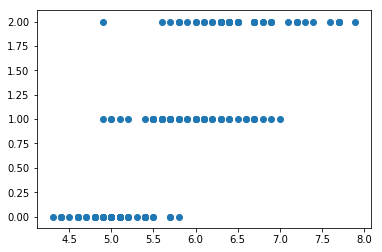

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
x = iris.data[:, :1]
y = iris.target

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.plot()

If only we could somehow modify the above problem to limit the value of the Lagrangian! Luckily (or should I say by design) we can introduce another constraint and limit how much the Lagrangian can grow. Let's call this slack variable $C$ and the optimization dual problem then becomes

$$
\begin{align}
	\underset{\lambda}{\text{maximize}}
		& \quad \sum_{i = 1}^{N} \lambda_{i} - \frac{1}{2} \sum_{i = 1}^{N} \sum_{j = 1}^{N} \lambda_{i} \lambda_{j} y^{i} y^{j} (x^{i} \cdot x^{j}) \\
	\text{subject to}
		& \quad 0 \leq \lambda_{i} \leq C \quad \forall i \,, \\
		& \quad \sum_{i = 1}^{N} \lambda_{i} y^{i} = 0
\end{align}
$$

Now solving the dual optimization problem allows us to obtain the Lagrangian multipliers for given values of the slack variable which unfortunately as a hyperparameter requires tunning! From here we can calculate the weights as below

$$
\mathbf{w} = \sum_{i=1}^{N} \lambda_{i} y^{i} \mathbf{x}^{i}
$$

For $b$ we know that the support vectors satisfy $y_{i} (\mathbf{w} \cdot \mathbf{x^{i}} + b) = 1$ so we can calculate it directly.

Following from the Lagrangian multipliers most of the weights will be zero since they would have no effect on the decision boundary. Only the ones associated with the support vectors will have non-zero values. Therefore, having trained on some data we can classify an unknown vector $\mathbf{p}$ as by the sign of the below.

$$
\text{sign} \ f(x) = \mathbf{w} \cdot \mathbf{p} + b = \sum_{i=1}^{N} (\lambda_{i} y^{i} \mathbf{x}^{i} \cdot \mathbf{p}) + b
$$

Finally, the above formulation has provided a direct way to change the feature space. Currently we are in a linear space given by the dot product. If we modify the dot product with a function known as a kernel we can change the feature space. We will investigate different kernels and their effects later in this post.

## Visualisation

The SVM implementation in scikit-learn is used. The first dataset is [make blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) which is random points sampled from a gaussian distribution to experiment with how SVM work and learn the mathematics behind it. The second set is the [iris](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset which has noisy points, thereby allowing the use of SVM in practice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm
import random
import sys
%matplotlib inline

Secondly we need to plot the results. The first step is to make a matrix of points which constituted our mesh with a grid point size of $h\times h$.

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

The second step is to fill the mesh with the contours values. Every grid point in the mesh is passed to the trained SVM classifier to determine its label. The result is a contour plot showing the decision bondaries.

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

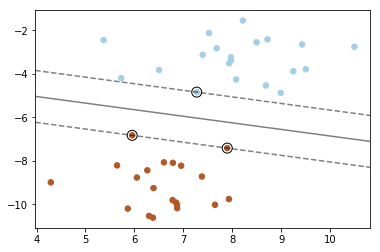

In [4]:
# we create 40 separable points
blobs = datasets.make_blobs(n_samples=40, centers=2, random_state=6)
X, y = blobs

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
YY, XX = np.meshgrid(ylim, xlim)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

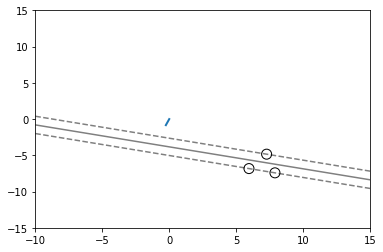

In [53]:
W = clf.coef_[0]
b = clf.intercept_[0]

# plot the decision function
ax = plt.gca()
ax.set_xlim(-10, 15)
ax.set_ylim(-15, 15)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
YY, XX = np.meshgrid(ylim, xlim)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

weight_x = np.array([0, W[0]])
weight_y = np.array([0, W[1]])

ax.plot(weight_x, weight_y, linewidth=2)
plt.show()

## Exploration

All the work done to this point in the blog post is for binary classification and traditionally SVM was designed for such problems. Methods exist which allow multi-class classification and a detailed description can be found [here](https://www.csie.ntu.edu.tw/~cjlin/papers/multisvm.pdf). In general two approaches exist:
- One vs. the rest: For $k$ classes train $k$ binary classifiers. Each classifier tests whether an example belongs to its own class versus any other class. The classifier with the largest output is taken to be the class of the example.
- One vs. one: For $k$ classes train $k(k − 1)/2$ binary classifiers. A voting procedure is used to combine the outputs. There are many proposals for a voting procedure discussed in the above paper.

In [24]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel - one vs. one',
          'LinearSVC (linear kernel) - one vs. all',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

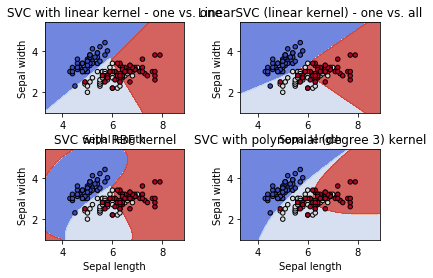

In [25]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_title(title)

plt.show()

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html